In [14]:
import pandas as pd
import quandl, math, datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression

In [16]:
style.use('ggplot')

In [2]:
df = quandl.get("WIKI/GOOGL")

In [3]:
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [4]:
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]

df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0

df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

In [5]:
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.072956    0.324968   44659000.0
2004-08-20   54.322689  7.921706    7.227007   22834300.0
2004-08-23   54.869377  4.049360   -1.227880   18256100.0
2004-08-24   52.597363  7.657099   -5.726357   15247300.0
2004-08-25   53.164113  3.886792    1.183658    9188600.0


In [6]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

In [7]:
forecast_out = int(math.ceil(0.1*len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

In [8]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

C:\Users\9syed\AppData\Local\Temp\ipykernel_12096\3881897463.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


In [9]:
df.dropna(inplace=True)
y = np.array(df['label'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

In [11]:
print(accuracy)

0.8906995542135409


In [17]:
forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

In [18]:
print(forecast_set, accuracy, forecast_out)

[ 694.68802341  679.09200527  679.00917934  696.76083526  725.09764953
  739.8834309   732.06302252  760.65208043  880.59060405  869.91386261
  880.1601125   879.0317695   856.29072175  831.78995821  829.88051617
  826.99429741  828.9270665   839.32786206  820.90163344  832.2968823
  825.95997957  848.01138307  842.77640894  832.20553844  831.81881473
  869.12810694  869.3467113   860.78762672  862.82435668  871.1239779
  862.53122995  871.33009177  859.80428183  823.62550598  818.60638659
  792.8485518   848.37449578  848.34661201  829.22773701  819.67382735
  798.81605207  813.5137452   806.02263633  786.43097636  809.47613442
  812.53016522  820.25836868  819.28895393  813.84325343  839.36281503
  829.7090494   847.94805378  825.57630718  836.29188014  821.23335166
  818.4755058   825.75464841  810.09369257  797.98797899  787.99022641
  798.83293708  807.74774457  839.51144958  849.08170796  846.68344498
  848.94392372  842.61708195  842.75279202  848.61246574  860.84453653
  852.83

In [23]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [24]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

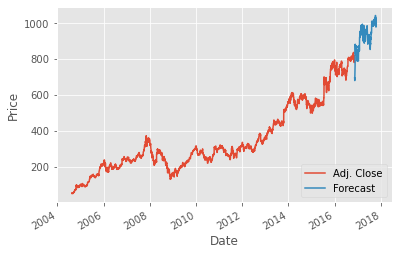

In [25]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()